# Pose similarity

## Articles
* https://medium.com/@cavaldovinos/human-pose-estimation-pose-similarity-dc8bf9f78556
* https://ai.googleblog.com/2021/01/recognizing-pose-similarity-in-images.html
* https://www.researchgate.net/publication/367092247_Discover_human_poses_similarity_and_action_recognition_based_on_machine_learning

In [1]:
import warnings
warnings.filterwarnings('ignore')
import cv2
from glob import glob
import numpy as np
from numpy import ndarray
import seaborn as sns
from typing import List
import matplotlib.pyplot as plt
from aipose.models.yolov7.domain import YoloV7Pose, YoloV7PoseKeypoints
from aipose.plot import plot

In [2]:
sns.set_theme()

In [3]:
def plot_matrix(cm, classes, title):
  fig, ax = plt.subplots(figsize=(10,10))  
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False, ax=ax)
  ax.set(title=title, xlabel="predicted label", ylabel="true label")

def plot_images(imgs, titles=[], rows=2, columns=2):
    fig = plt.figure(figsize=(20, 10))

    for i, img in enumerate(imgs):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img)
        plt.axis('off')
        if i < len(titles):
            plt.title(titles[i])

# Case 1 - Set of yoga poses

In [4]:
model = YoloV7Pose()

imgs  = []
predictions = []
for i, path in enumerate(glob('./poses/*.jpg')):
    image: ndarray = cv2.imread(path)
    prediction: List[YoloV7PoseKeypoints]
    image_tensor: ndarray
    prediction, image_tensor = model(image)
    img = plot(image_tensor, np.array([value.raw_keypoints for value in prediction]), plot_image=False, return_img=True)
    imgs.append(img)
    predictions.append(prediction[0])

Using cache found in /home/user/.cache/torch/hub/WongKinYiu_yolov7_main


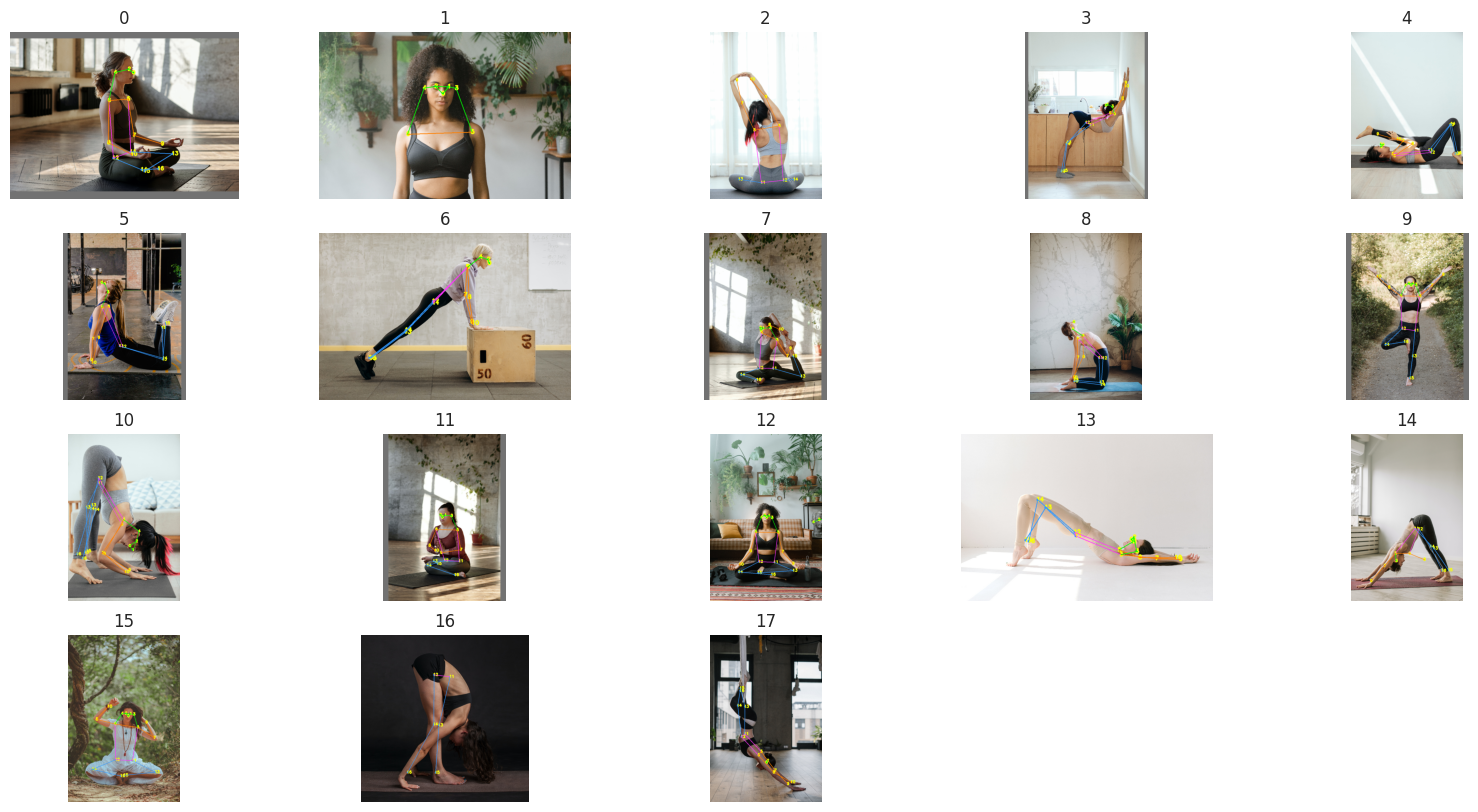

In [5]:
%matplotlib inline
plot_images(imgs, titles=range(len(imgs)), rows=4, columns=5)

In [6]:
start = 1
all_similarity_list = []
for predicition_a in predictions:
    similarity_list = []
    for prediction_b in predictions:
        similarity = predicition_a.cosine_similarity(prediction_b)
        similarity_list.append(str(similarity))
    all_similarity_list.append(similarity_list)

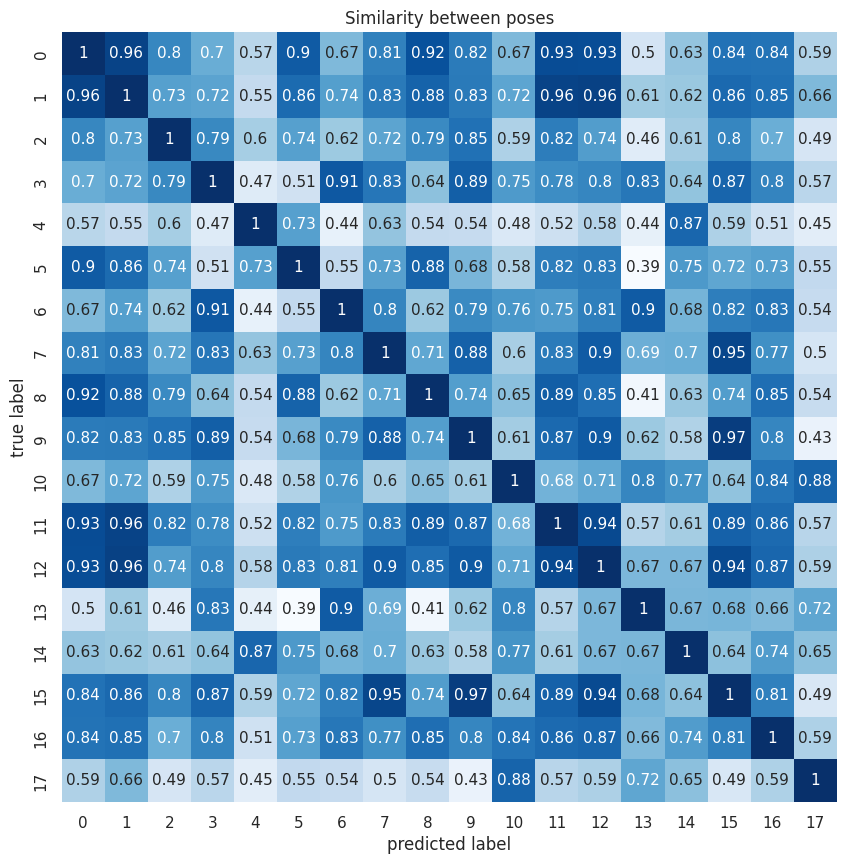

In [7]:
cm = np.array(all_similarity_list).astype('float64')
classes = [str(i) for i in range(len(imgs))]
title = "Similarity between poses"

plot_matrix(cm, classes, title)

# Case 2 - People back and front

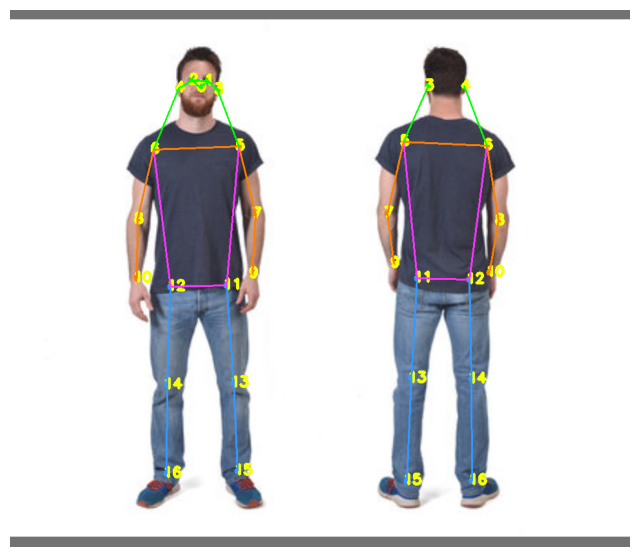

In [8]:
image: ndarray = cv2.imread('../person.jpg')
prediction: List[YoloV7PoseKeypoints]
image_tensor: ndarray
prediction, image_tensor = model(image)
img = plot(image_tensor, np.array([value.raw_keypoint for value in prediction]), plot_image=True, return_img=True)

In [9]:
prediction[0].cosine_similarity(prediction[0])

1.0

In [10]:
prediction[1].turn()
prediction[0].cosine_similarity(prediction[1])

0.9987